Linear-Regression-Sales

In [6]:
t = read.csv('sales_data_lr.csv')

In [7]:
head(t)

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1
6,5,2015-07-31,5651,589,1,1,0,1


In [12]:
str(t)

'data.frame':	1017209 obs. of  9 variables:
 $ Store        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek    : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Date         : Factor w/ 942 levels "2013-01-01","2013-01-02",..: 942 942 942 942 942 942 942 942 942 942 ...
 $ Sales        : int  5263 6064 8314 13995 4822 5651 15344 8492 8565 7185 ...
 $ Customers    : int  555 625 821 1498 559 589 1414 833 687 681 ...
 $ Open         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Promo        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ StateHoliday : Factor w/ 4 levels "0","a","b","c": 1 1 1 1 1 1 1 1 1 1 ...
 $ SchoolHoliday: int  1 1 1 1 1 1 1 1 1 1 ...


In [8]:
#install.packages("ggplot2", repos = "http://cran.rstudio.com/")

In [9]:
library(ggplot2)

# Check if target variable follows normal distribution

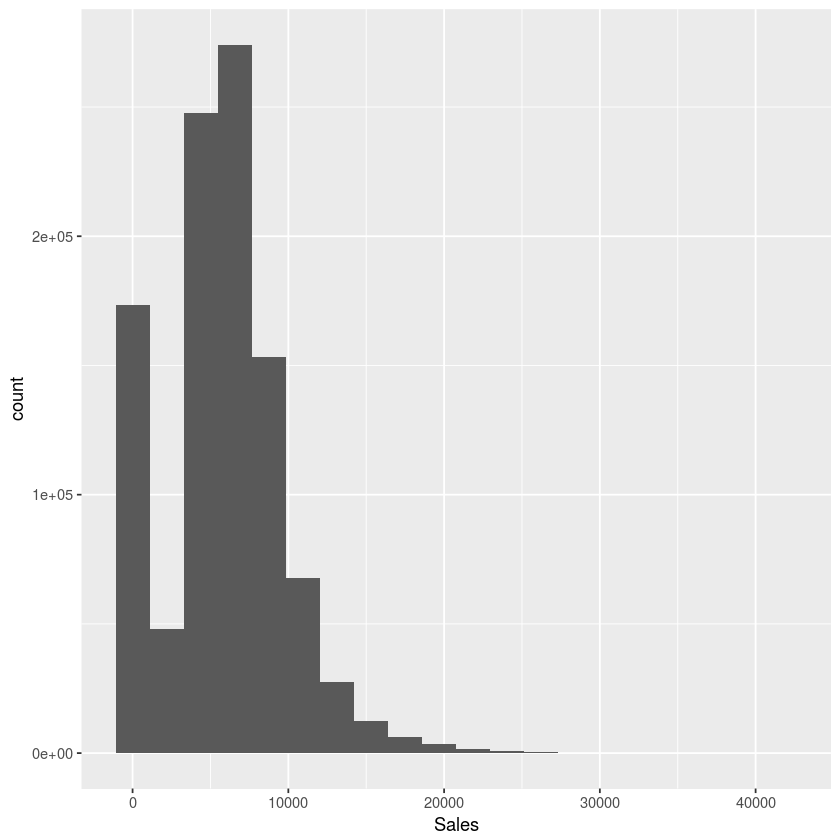

In [14]:
ggplot(t,aes(Sales)) + geom_histogram(bins=20)

# Remove data on days of when store is closed.

## Check if store is closed then sales is zero or not (using boxplot)

### Remember for box plot we sould always have one factor variable and 1 continous variable

In [16]:
t$Open = as.factor(t$Open)

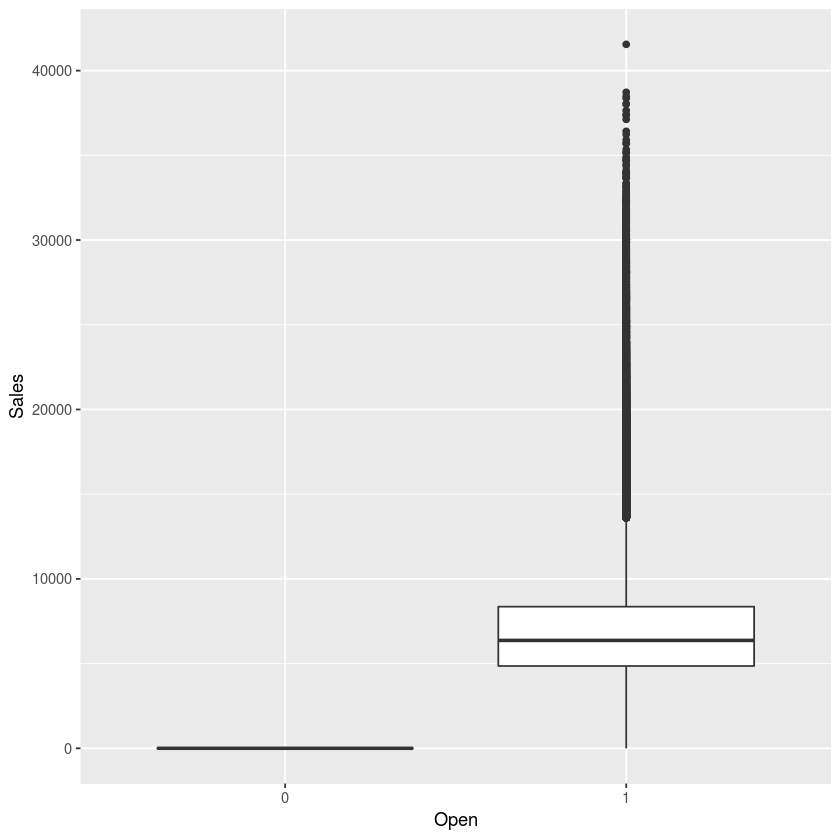

In [18]:
ggplot(t,aes(Open,Sales)) + geom_boxplot()

## Check if store is closed then sales is zero or not (using formula)

In [21]:
aggregate(t$Sales,by = list(t$Open),FUN=mean)

Group.1,x
0,0.000
1,6955.514


## Now as sales is zero on days when store is closed, remove those observations

In [23]:
t_open <- t[t$Open==1,]
t_closed <- t[t$Open==0,]

In [24]:
head(t_closed)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
292,292,5,2015-07-31,0,0,0,1,0,1
876,876,5,2015-07-31,0,0,0,1,0,1
1407,292,4,2015-07-30,0,0,0,1,0,1
1991,876,4,2015-07-30,0,0,0,1,0,1
2522,292,3,2015-07-29,0,0,0,1,0,1
3106,876,3,2015-07-29,0,0,0,1,0,1


In [25]:
str(t_open)

'data.frame':	844392 obs. of  9 variables:
 $ Store        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek    : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Date         : Factor w/ 942 levels "2013-01-01","2013-01-02",..: 942 942 942 942 942 942 942 942 942 942 ...
 $ Sales        : int  5263 6064 8314 13995 4822 5651 15344 8492 8565 7185 ...
 $ Customers    : int  555 625 821 1498 559 589 1414 833 687 681 ...
 $ Open         : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Promo        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ StateHoliday : Factor w/ 4 levels "0","a","b","c": 1 1 1 1 1 1 1 1 1 1 ...
 $ SchoolHoliday: int  1 1 1 1 1 1 1 1 1 1 ...


## Plot histogram after removing sales on closed days data

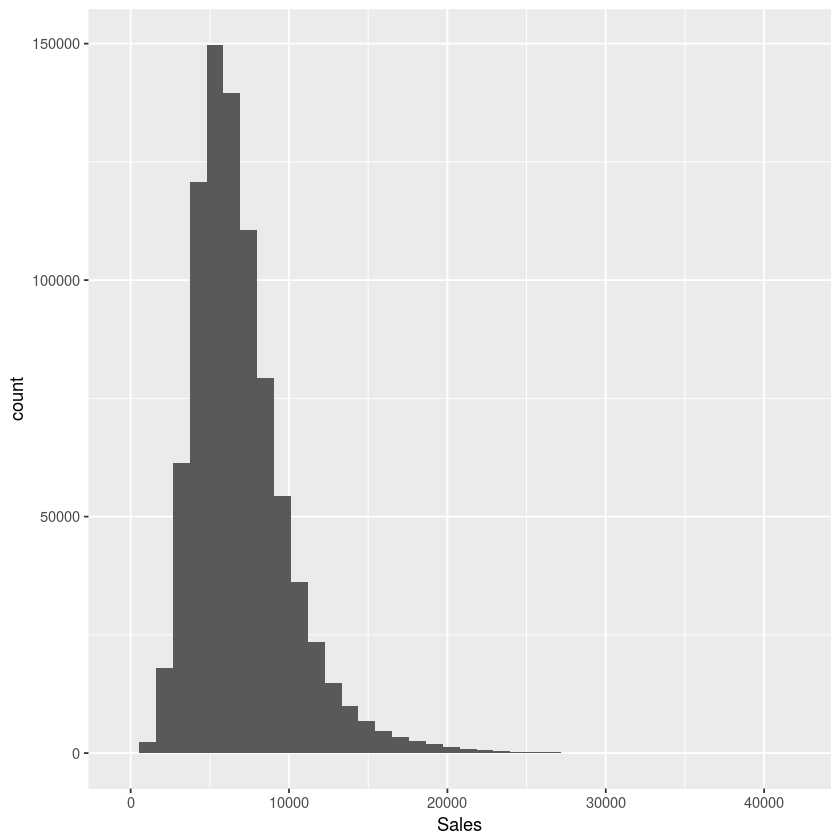

In [30]:
ggplot(t_open,aes(Sales)) + geom_histogram(bins=40)

In [29]:
summary(t_open$Sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    4859    6369    6956    8360   41550 

# Using Z-scores check number of values out of 3 SD

In [31]:
sd(t_open$Sales)

[1] 3104.215

## Fitler observations below 3 SD 6956+(3*3104) - number of values beyond 3 SD

In [56]:
t_outliers = t_open[t_open$Salies > 16268,]
nrow(t_outliers)

[1] 0

## Square root transformation - our hist looks better after this
Note: The square root, x to x^(1/2) = sqrt(x), is a transformation with a moderate effect on distribution shape: it is weaker than the logarithm and the cube root. It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values.

In [43]:
t_open$Sales_sq=sqrt(t_open$Sales)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


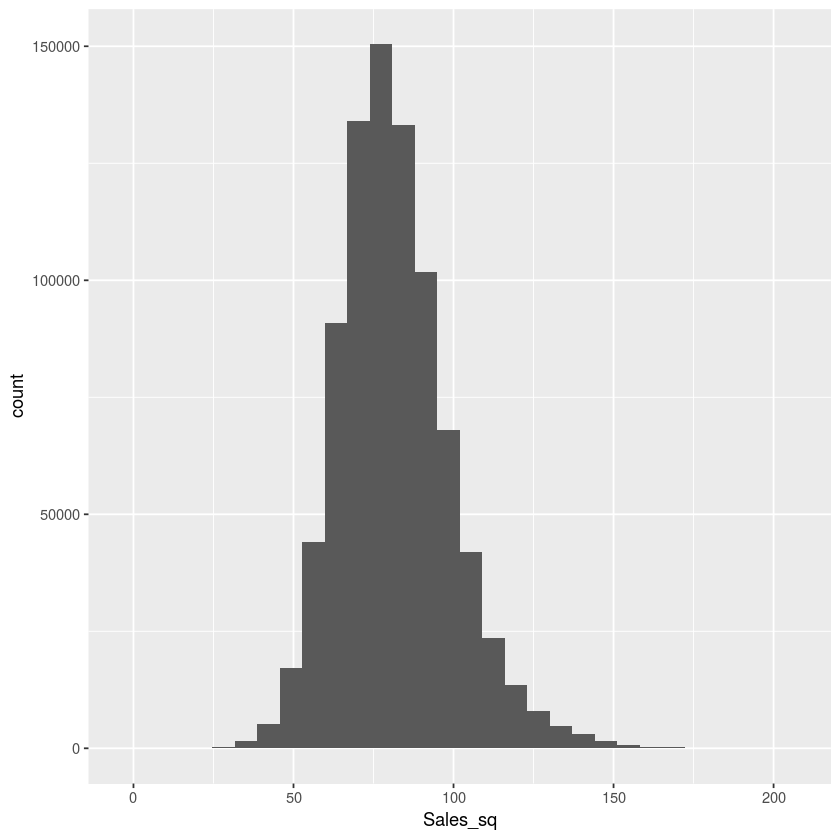

In [45]:
ggplot(t_open,aes(Sales_sq)) + geom_histogram()

# Check input variables

## Find missing values

In [48]:
sum(is.na(t_open$DayOfWeek))

[1] 0

In [49]:
sum(is.na(t_open$Customers))

[1] 0

In [50]:
sum(is.na(t_open$Promo))

[1] 0

In [51]:
sum(is.na(t_open$StateHoliday))

[1] 0

In [52]:
sum(is.na(t_open$SchoolHoliday))

[1] 0

# Divide the data into train and test data

In [55]:
set.seed(7)
ids = sample(nrow(t_open),nrow(t_open)*0.8)
train=t_open[ids,]
test=t_open[-ids,]

# Build linear model

In [58]:
names (t_open)

[1] "Store"         "DayOfWeek"     "Date"          "Sales"        
 [5] "Customers"     "Open"          "Promo"         "StateHoliday" 
 [9] "SchoolHoliday" "Sales_sq"

In [68]:
pred = lm(Sales_sq ~ Customers + DayOfWeek + Promo + StateHoliday, data=train)

# Model summary 

In [69]:
summary(pred)


Call:
lm(formula = Sales_sq ~ Customers + DayOfWeek + Promo + StateHoliday, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-139.286   -5.885   -0.304    5.732  101.972 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)    5.440e+01  3.855e-02 1410.917  < 2e-16 ***
Customers      3.278e-02  2.936e-05 1116.536  < 2e-16 ***
DayOfWeek     -4.630e-01  7.010e-03  -66.050  < 2e-16 ***
Promo          8.523e+00  2.460e-02  346.438  < 2e-16 ***
StateHolidaya -1.187e+01  3.981e-01  -29.817  < 2e-16 ***
StateHolidayb -1.876e+01  8.600e-01  -21.816  < 2e-16 ***
StateHolidayc -8.524e+00  1.236e+00   -6.895 5.37e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.493 on 675506 degrees of freedom
Multiple R-squared:  0.705,	Adjusted R-squared:  0.705 
F-statistic: 2.691e+05 on 6 and 675506 DF,  p-value: < 2.2e-16


# Build linear model with school holiday variable

In [66]:
pred2 = lm(Sales_sq ~ Customers + DayOfWeek + Promo + StateHoliday + SchoolHoliday, data=train)

In [67]:
summary (pred2)


Call:
lm(formula = Sales_sq ~ Customers + DayOfWeek + Promo + StateHoliday + 
    SchoolHoliday, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-139.151   -5.881   -0.299    5.727  101.625 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)    5.427e+01  3.958e-02 1371.213  < 2e-16 ***
Customers      3.278e-02  2.936e-05 1116.428  < 2e-16 ***
DayOfWeek     -4.494e-01  7.075e-03  -63.520  < 2e-16 ***
Promo          8.527e+00  2.460e-02  346.648  < 2e-16 ***
StateHolidaya -1.185e+01  3.980e-01  -29.770  < 2e-16 ***
StateHolidayb -1.906e+01  8.601e-01  -22.156  < 2e-16 ***
StateHolidayc -8.862e+00  1.236e+00   -7.168 7.59e-13 ***
SchoolHoliday  4.180e-01  2.952e-02   14.160  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.491 on 675505 degrees of freedom
Multiple R-squared:  0.7051,	Adjusted R-squared:  0.7051 
F-statistic: 2.307e+05 on 7 and 675505 DF,  p-value: < 2.2e-1

## From #7 and #8 we come to know that adding 'School holiday' doesn't make any difference (see R-sqaured value it is almost same for both models)

# Model validation

In [74]:
library(MASS)

## Errors in normal distribution

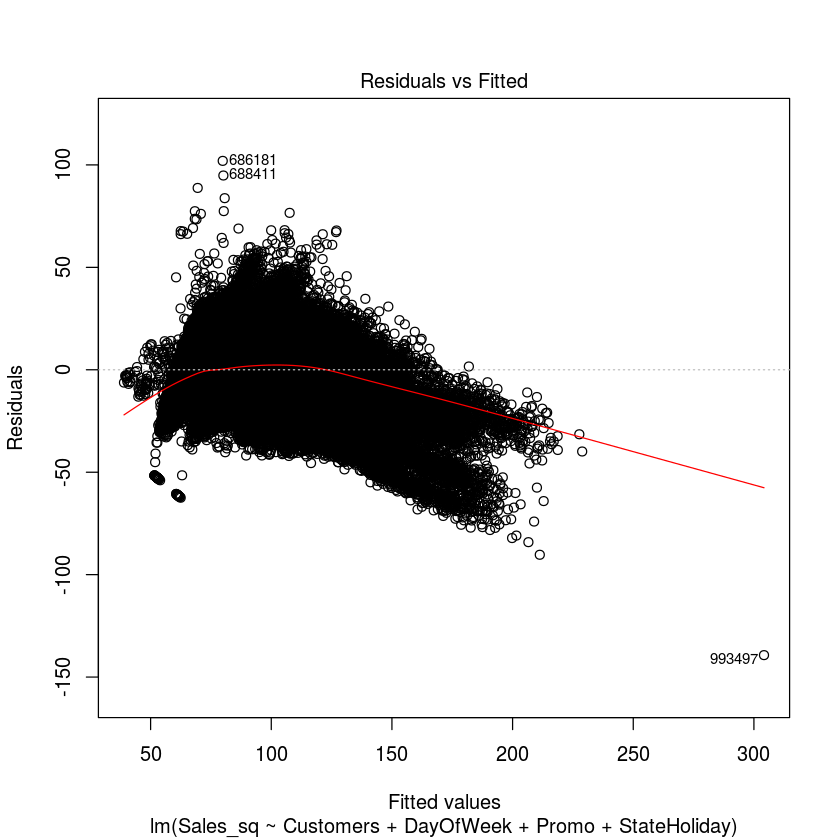

In [75]:
plot(pred,which=1)

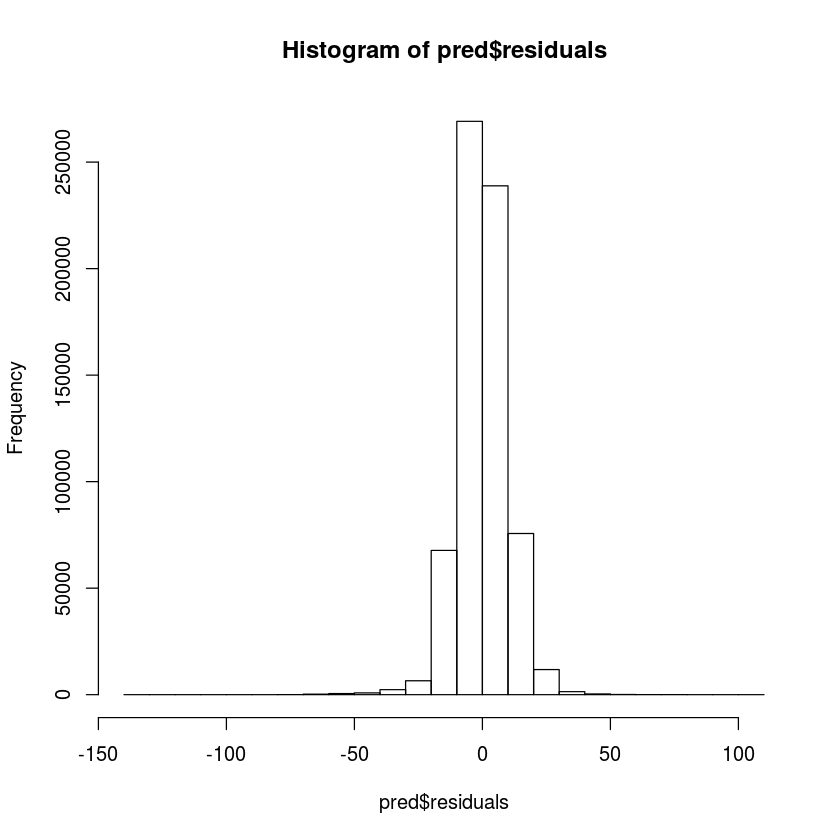

In [81]:
hist(pred$residualsiduals)

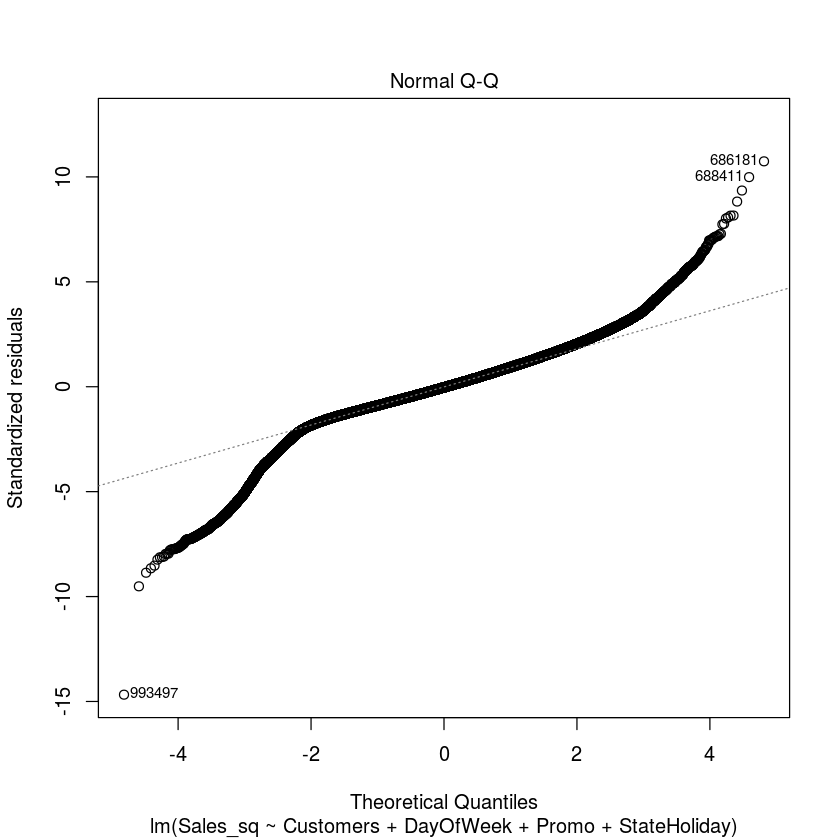

In [76]:
plot(pred,which=2)

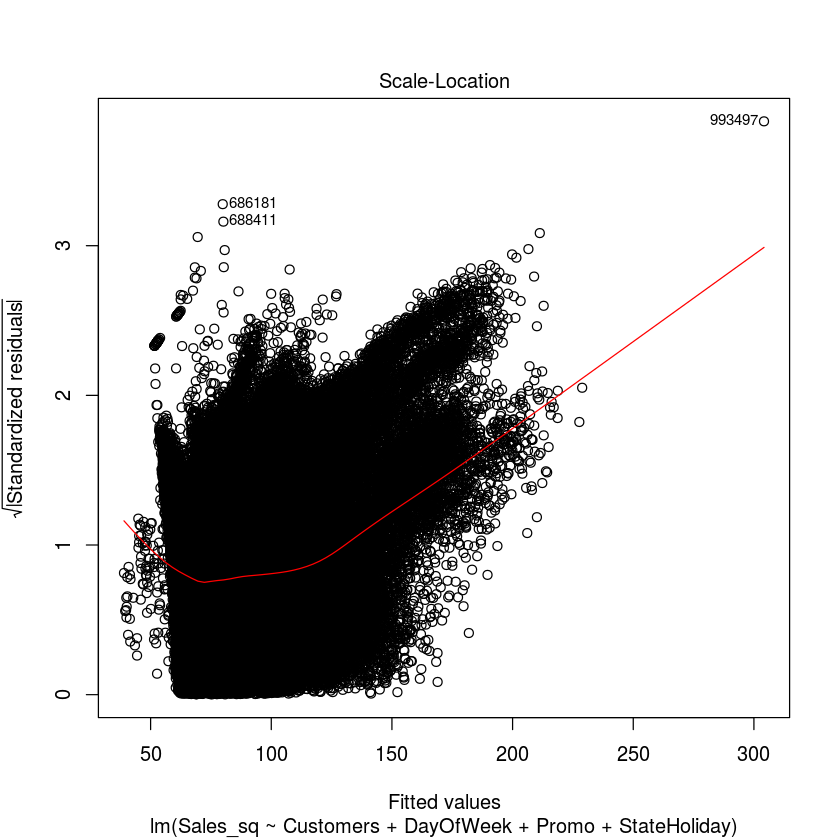

In [86]:
plot(pred,which=3)

In [87]:
#leverages
cd = cooks.distance(pred)
cutoff = 4 /(nrow(train) - length(pred$coefficients))
cutoff

[1] 5.921487e-06

Warning message in plot.window(...):
“"levels" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"levels" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"levels" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"levels" is not a graphical parameter”Warning message in box(...):
“"levels" is not a graphical parameter”Warning message in title(...):
“"levels" is not a graphical parameter”Warning message in title(sub = sub.caption, ...):
“"levels" is not a graphical parameter”

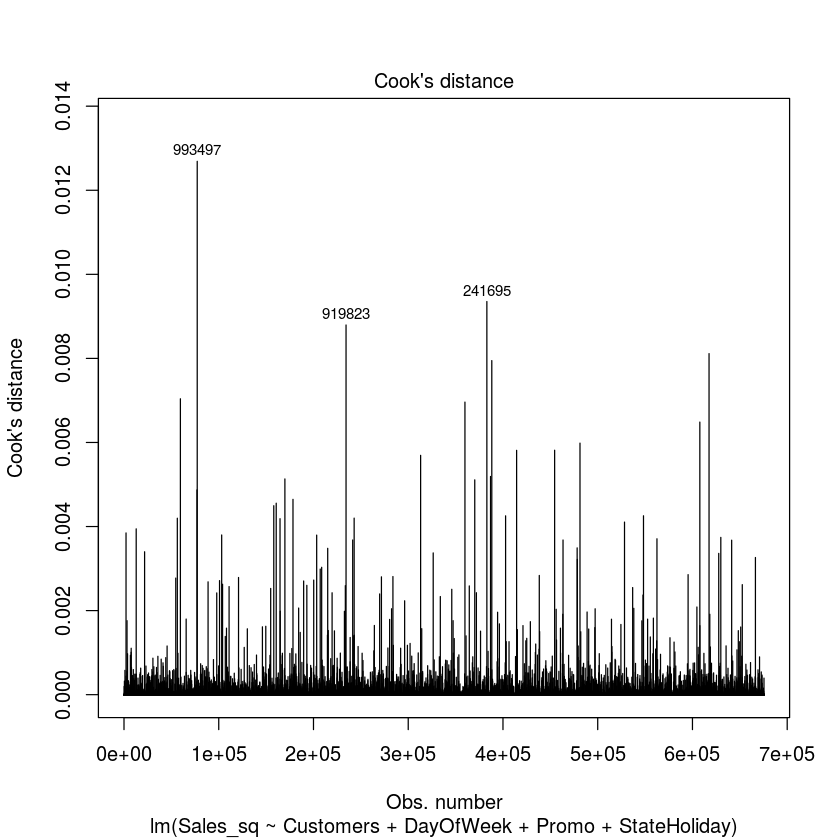

In [80]:
plot(pred,which=4,levels = cutoff)

## heteroscedasticity

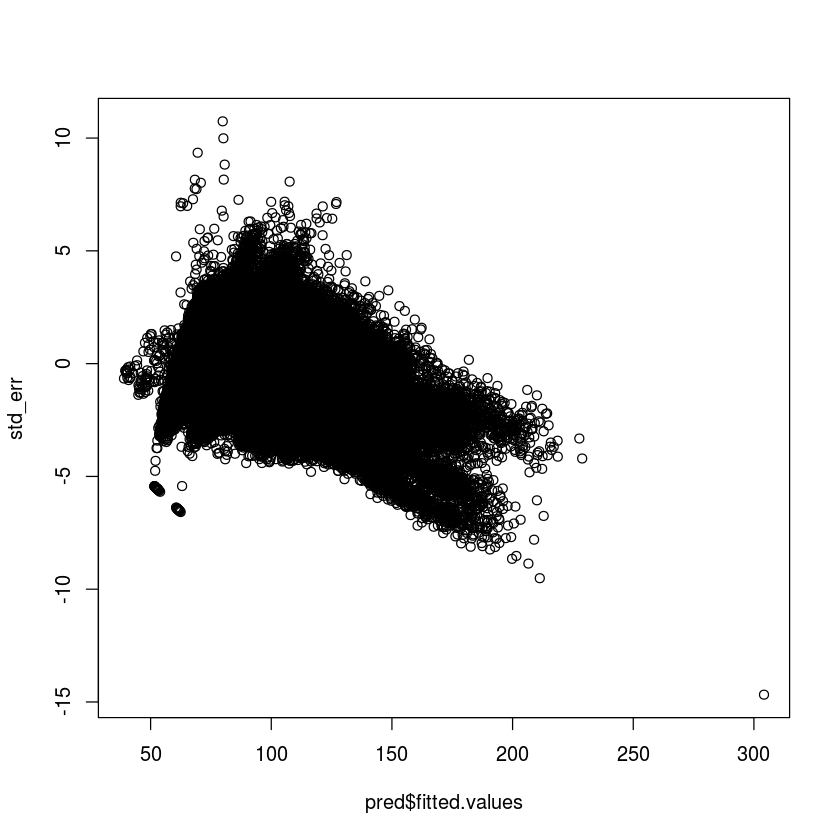

In [83]:
std_err = stdres(pred)
plot(pred$fitted.values,std_err)

# Model assesment

In [88]:
test$pred_sq = predict(pred,newdata=test)

In [89]:
head(test)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_sq,pred_sq
1,1,5,2015-07-31,5263,555,1,1,0,1,72.54654,78.79630
2,2,5,2015-07-31,6064,625,1,1,0,1,77.87169,81.09099
6,6,5,2015-07-31,5651,589,1,1,0,1,75.17313,79.91086
10,10,5,2015-07-31,7185,681,1,1,0,1,84.76438,82.92674
11,11,5,2015-07-31,10457,1236,1,1,0,1,102.25947,101.12034
14,14,5,2015-07-31,6544,710,1,1,0,1,80.89499,83.87740


## Compute RMSE

In [91]:
rmse = sqrt(mean((test$Sales_sq-test$pred_sq)**2))
rmse

[1] 9.484305

### Mean

In [92]:
mean(test$Sales_sq)

[1] 81.52745

In [93]:
9.46/81.5

[1] 0.1160736

# Create new variables to improve the model

## Create new variable month and starting week of the month

### Look at distribution of weekday and sales

In [96]:
aggregate (t_open$Sales, by = list(t_open$DayOfWeek),FUN=mean)

Group.1,x
1,8216.073
2,7088.114
3,6728.123
4,6767.310
5,7072.677
6,5874.840
7,8224.724


In [112]:
head(t_open)

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_sq,Weekend,Month,dayofmonth,month_end,month_beg
1,5,2015-07-31,5263,555,1,1,0,1,72.54654,No,7,31,Yes,No
2,5,2015-07-31,6064,625,1,1,0,1,77.87169,No,7,31,Yes,No
3,5,2015-07-31,8314,821,1,1,0,1,91.18114,No,7,31,Yes,No
4,5,2015-07-31,13995,1498,1,1,0,1,118.30046,No,7,31,Yes,No
5,5,2015-07-31,4822,559,1,1,0,1,69.44062,No,7,31,Yes,No
6,5,2015-07-31,5651,589,1,1,0,1,75.17313,No,7,31,Yes,No


In [113]:
t_open$Weekend = ifelse(t_open$DayOfWeek %in% c(1,7),"Yes", "No")
head(t_open)

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_sq,Weekend,Month,dayofmonth,month_end,month_beg
1,5,2015-07-31,5263,555,1,1,0,1,72.54654,No,7,31,Yes,No
2,5,2015-07-31,6064,625,1,1,0,1,77.87169,No,7,31,Yes,No
3,5,2015-07-31,8314,821,1,1,0,1,91.18114,No,7,31,Yes,No
4,5,2015-07-31,13995,1498,1,1,0,1,118.30046,No,7,31,Yes,No
5,5,2015-07-31,4822,559,1,1,0,1,69.44062,No,7,31,Yes,No
6,5,2015-07-31,5651,589,1,1,0,1,75.17313,No,7,31,Yes,No


### lubridata to convert date(string) to datetime

In [102]:
install.packages('lubridate')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [105]:
library(lubridate)

In [106]:
t_open$Date = as.Date(t_open$Date)

ERROR: Error in eval(expr, envir, enclos): could not find function "as.date"


In [108]:
t_open$dayofmonth = day(t_open$Date)

In [107]:
t_open$Month = month(t_open$Date)

In [109]:
## Create new varibale for month end and month starting

In [110]:
head(t_open)

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_sq,Weekend,Month,dayofmonth
1,5,2015-07-31,5263,555,1,1,0,1,72.54654,No,7,31
2,5,2015-07-31,6064,625,1,1,0,1,77.87169,No,7,31
3,5,2015-07-31,8314,821,1,1,0,1,91.18114,No,7,31
4,5,2015-07-31,13995,1498,1,1,0,1,118.30046,No,7,31
5,5,2015-07-31,4822,559,1,1,0,1,69.44062,No,7,31
6,5,2015-07-31,5651,589,1,1,0,1,75.17313,No,7,31


In [111]:
t_open$month_end = ifelse(t_open$dayofmonth >= 26,"Yes","No")
t_open$month_beg = ifelse(t_open$dayofmonth <=6,"Yes","No")


In [115]:
ids = sample(nrow(t_open),nrow(t_open)*.8)
train = t_open[ids,]
test=t_open[-ids,]

In [116]:
names(t_open)

[1] "Store"         "DayOfWeek"     "Date"          "Sales"        
 [5] "Customers"     "Open"          "Promo"         "StateHoliday" 
 [9] "SchoolHoliday" "Sales_sq"      "Weekend"       "Month"        
[13] "dayofmonth"    "month_end"     "month_beg"

## Build new model

In [119]:
pred3 = lm(Sales_sq ~ Customers + Weekend + Promo + month_end + + dayofmonth + month_beg, data=train)
summary(pred3)


Call:
lm(formula = Sales_sq ~ Customers + Weekend + Promo + month_end + 
    +dayofmonth + month_beg, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-134.429   -5.763   -0.222    5.698  103.146 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.269e+01  4.886e-02 1078.36   <2e-16 ***
Customers     3.236e-02  2.923e-05 1106.99   <2e-16 ***
WeekendYes    3.043e+00  3.103e-02   98.06   <2e-16 ***
Promo         8.748e+00  2.397e-02  364.97   <2e-16 ***
month_endYes  2.739e+00  4.419e-02   61.98   <2e-16 ***
dayofmonth   -5.441e-02  2.571e-03  -21.16   <2e-16 ***
month_begYes  7.420e-01  4.429e-02   16.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.422 on 675506 degrees of freedom
Multiple R-squared:  0.7091,	Adjusted R-squared:  0.7091 
F-statistic: 2.744e+05 on 6 and 675506 DF,  p-value: < 2.2e-16


# Customer vs sales - just to check if there is any co-relation

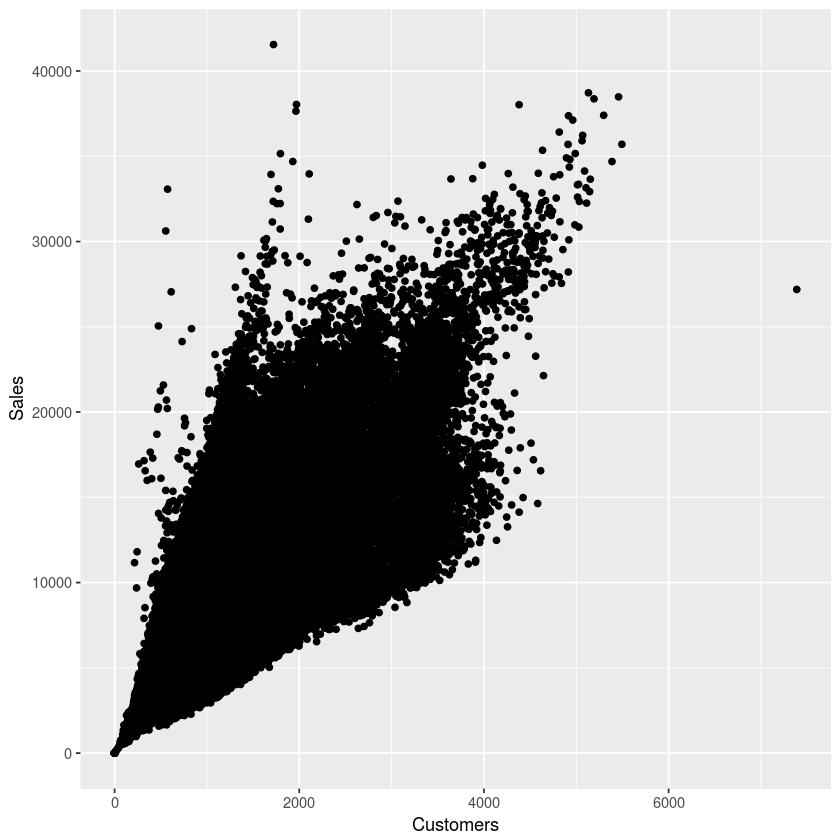

In [121]:
ggplot(t_open,aes(Customers,Sales)) + geom_point()

In [122]:
cor(t_open$Sales,t_open$Customers)

[1] 0.8235967